In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
from sklearn import preprocessing

In [3]:
from sklearn.cluster import KMeans

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [189]:
df=pd.read_csv('deathcases.csv')

In [190]:
df['District']=df['District'].apply(lambda x: x.lower().strip(' '))

In [191]:
df['Symptoms']=df['Symptoms'].apply(lambda x: x.lower().strip(' '))

In [192]:
df['Cause']=df['Cause'].apply(lambda x: x.lower().strip(' '))

In [193]:
label_encoder=preprocessing.LabelEncoder()

In [194]:
stdScaler=preprocessing.MinMaxScaler()

In [170]:
label_encoder.classes_

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

In [195]:
#df['Age']=label_encoder.fit_transform(df['Age'])

In [196]:
df['District']=label_encoder.fit_transform(df['District'])

In [197]:
df['Gender']=df['Gender'].apply(lambda x: x.strip(' ').title())

In [198]:
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})

In [199]:
df.head(2)

,patient No,Age,Gender,District,Admit Date,DeathDate,Symptoms,Cause,File Date,Daysdmitted
0,12124,63,0,2,14-12-2020,31-12-2020,fever/cough/breathing difficulty,covid19 pneumonia,01-01-2021,17
1,12125,53,0,20,22-12-2020,31-12-2020,fever/cough/dysponea,covid19 pneumonia,01-01-2021,9


In [200]:
df['District']=stdScaler.fit_transform(np.array(df['District']).reshape(-1, 1))

In [201]:
df['Age']=stdScaler.fit_transform(np.array(df['Age']).reshape(-1, 1))

In [177]:
index=[]

In [178]:
for i in range(len(df)):
    l1=[df.iloc[i, 6]]
    s=','.join(l1)
    l2.append(s)
    index.append(df.iloc[i, 0])

In [179]:
countvectorizer=CountVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 4))

In [180]:
countmodel=countvectorizer.fit_transform(l2)

In [181]:
count_tokens=countvectorizer.get_feature_names_out()

In [182]:
count_tokens

array(['abdominal', 'abdominal discomfort',
       'abdominal discomfort vomiting', ..., 'weakness loss appetite',
       'weakness loss taste', 'weakness loss taste myalgia'], dtype=object)

In [183]:
df_countvect=pd.DataFrame(data=countmodel.toarray(), index=index, columns=count_tokens)

ValueError: Shape of passed values is (43706, 4724), indices imply (21853, 4724)

In [35]:
df_countvect.dropna(axis=1, how='all')

,abdominal,abdominal discomfort,abdominal discomfort vomiting,abdominal distension,abdominal pain,abdominal pain vomiting,abductor,abductor vocal,abductor vocal cord,abductor vocal cord palsy,...,wall myocaridal infarction,weakness,weakness breathlessness,weakness headache,weakness loose,weakness loose stool,weakness loss,weakness loss appetite,weakness loss taste,weakness loss taste myalgia
12124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
tfidf=TfidfVectorizer(analyzer='word', stop_words='english')

In [185]:
tfidfmodel=tfidf.fit_transform(l2)

In [186]:
df_tfidf=pd.DataFrame(tfidfmodel.toarray(), index=index, columns=tfidf.get_feature_names_out())

ValueError: Shape of passed values is (43706, 507), indices imply (21853, 507)

In [ ]:
df_tfidf.head(2)

In [40]:
df_tfidf.iloc[0, :][df_tfidf.iloc[0, :]>0]

breathing     0.516116
cough         0.496939
difficulty    0.516084
fever         0.469397
Name: 12124, dtype: float64

In [41]:
df_tfidf.iloc[50, :][df_tfidf.iloc[50, :]>0]

constipation    0.984499
fever           0.175390
Name: 12177, dtype: float64

In [42]:
df_tfidf.iloc[100, :][df_tfidf.iloc[100, :]>0]

breathing     0.516116
cough         0.496939
difficulty    0.516084
fever         0.469397
Name: 12225, dtype: float64

In [43]:
df_tfidf.iloc[173, :][df_tfidf.iloc[173, :]>0]

apnea             0.563067
diabetes          0.154697
hypertension      0.177120
hypothyroidism    0.350645
mellitus          0.154930
obstructive       0.404541
sleep             0.563067
Name: 12297, dtype: float64

In [44]:
df_tfidf.iloc[217, :][df_tfidf.iloc[217, :]>0]

cough     0.214416
fever     0.202532
loose     0.674380
stools    0.676918
Name: 12344, dtype: float64

In [45]:
df_tfidf.iloc[1548, :][df_tfidf.iloc[1548, :]>0]

fever    1.0
Name: 13697, dtype: float64

In [46]:
df_tfidf.iloc[2694, :][df_tfidf.iloc[2694, :]>0]

breathing     0.516116
cough         0.496939
difficulty    0.516084
fever         0.469397
Name: 14895, dtype: float64

In [47]:
df_tfidf.iloc[12586, :][df_tfidf.iloc[12586, :]>0]

breathing     0.707129
difficulty    0.707085
Name: 26856, dtype: float64

In [181]:
for i in df_tfidf.columns:
    print(i, df_tfidf[i].value_counts()[0.000000])

abdominal 21835
abductor 21852
absess 21852
accident 21693
ache 21850
acidosis 21841
acquired 21852
active 21852
acute 20069
adenocarcinoma 21852
age 21842
aids 21842
aik 21852
alcoholic 21852
altered 21830
ampulation 21852
ampullary 21852
anaemia 21852
anal 21852
anc 21850
anemia 21831
aneurysm 21852
angina 21852
angioplasty 21851
anorexia 21852
anosmia 21852
antenatal 21852
antepartum 21851
anterior 21848
antivirals 21852
aorotic 21852
aortic 21851
apetite 21851
apettite 21852
apnea 21848
apnoea 21852
appetite 21786
aquired 21851
arachnoid 21852
arrest 21766
arrrest 21852
arteritis 21852
artery 21102
arthritis 21840
artial 21850
aspiration 21851
asthma 21733
asthmacterial 21852
astrocytoma 21852
asymptomatic 18227
ataxia 21852
atrial 21848
attack 21852
atypical 21845
autism 21852
autoimmune 21852
axonal 21852
azotemia 21852
bacterial 21852
beathlessness 21852
bicytopenia 21852
bilateral 21727
biltateral 21852
bipolar 21851
bladder 21847
blindness 21852
block 21852
blood 21852
body 21

SyntaxError: invalid syntax (369384973.py, line 1)

In [57]:
df['District']

0         2
1        20
2        22
3         2
4        25
         ..
21848    22
21849     3
21850     3
21851     3
21852    28
Name: District, Length: 21853, dtype: int32

In [48]:
df_tfidf['Age']=df['Age'].to_list()

In [49]:
df_tfidf['Gender']=df['Gender'].to_list()

In [50]:
df_tfidf['District']=df['District'].to_list()

In [51]:
df['District']

0        0.052632
1        0.526316
2        0.578947
3        0.052632
4        0.657895
           ...   
21848    0.578947
21849    0.078947
21850    0.078947
21851    0.078947
21852    0.736842
Name: District, Length: 21853, dtype: float64

In [52]:
df_tfidf

,abdominal,abductor,absess,accident,ache,acidosis,active,acute,adenocarcinoma,age,...,vestibular,viscus,vocal,vomiting,vomitting,wall,weakness,Age,Gender,District
12124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607843,1,0.052632
12125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509804,1,0.526316
12126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.715686,1,0.578947
12127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.686275,1,0.052632
12128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.715686,1,0.657895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725490,1,0.578947
36769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1,0.078947
36770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323529,1,0.078947
36771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725490,1,0.078947


In [53]:
wcss=[]

In [54]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(df_tfidf)
    wcss.append(kmeans.inertia_)

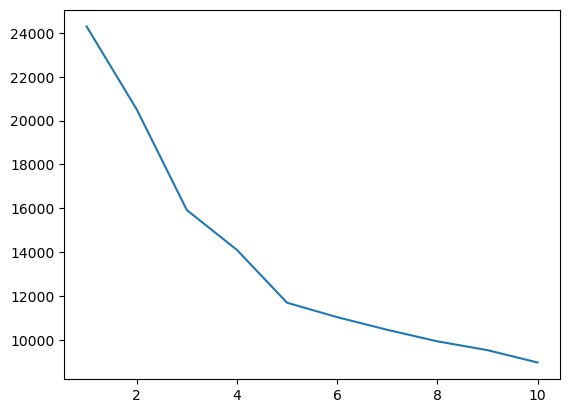

In [55]:
plt.plot(range(1, 11), wcss)

In [56]:
kmeans=KMeans(n_clusters=5, random_state=0, n_init='auto')

In [57]:
kmeans.fit(df_tfidf)

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [58]:
cluster_labels=kmeans.predict(df_tfidf)

In [61]:
df['cluster']=cluster_labels

In [146]:
for i in cluster_labels:
    print(df_tfidf[df_tfidf['cluster']==i].describe())

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

         abdominal  abductor  absess     accident         ache     acidosis  \
count  5920.000000    5920.0  5920.0  5920.000000  5920.000000  5920.000000   
mean      0.000810       0.0     0.0     0.003943     0.000078     0.000266   
std       0.023748       0.0     0.0     0.044791     0.006034     0.011875   
min       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
max       0.793896       0.0     0.0     0.634313     0.464238     0.563069   

       active        acute  adenocarcinoma          age  ...  viscus   vocal  \
count  5920.0  5920.000000          5920.0  5920.000000  ...  5920.0  5920.0   
mean      0.0     0.001041             0.0     0.000676  ...     0.0     0.0   
std       0.0     0.024392             0.0     0

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

         abdominal  abductor  absess     accident         ache     acidosis  \
count  5920.000000    5920.0  5920.0  5920.000000  5920.000000  5920.000000   
mean      0.000810       0.0     0.0     0.003943     0.000078     0.000266   
std       0.023748       0.0     0.0     0.044791     0.006034     0.011875   
min       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
max       0.793896       0.0     0.0     0.634313     0.464238     0.563069   

       active        acute  adenocarcinoma          age  ...  viscus   vocal  \
count  5920.0  5920.000000          5920.0  5920.000000  ...  5920.0  5920.0   
mean      0.0     0.001041             0.0     0.000676  ...     0.0     0.0   
std       0.0     0.024392             0.0     0

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

         abdominal  abductor  absess     accident         ache     acidosis  \
count  5920.000000    5920.0  5920.0  5920.000000  5920.000000  5920.000000   
mean      0.000810       0.0     0.0     0.003943     0.000078     0.000266   
std       0.023748       0.0     0.0     0.044791     0.006034     0.011875   
min       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
max       0.793896       0.0     0.0     0.634313     0.464238     0.563069   

       active        acute  adenocarcinoma          age  ...  viscus   vocal  \
count  5920.0  5920.000000          5920.0  5920.000000  ...  5920.0  5920.0   
mean      0.0     0.001041             0.0     0.000676  ...     0.0     0.0   
std       0.0     0.024392             0.0     0

         abdominal  abductor  absess     accident         ache     acidosis  \
count  5920.000000    5920.0  5920.0  5920.000000  5920.000000  5920.000000   
mean      0.000810       0.0     0.0     0.003943     0.000078     0.000266   
std       0.023748       0.0     0.0     0.044791     0.006034     0.011875   
min       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
max       0.793896       0.0     0.0     0.634313     0.464238     0.563069   

       active        acute  adenocarcinoma          age  ...  viscus   vocal  \
count  5920.0  5920.000000          5920.0  5920.000000  ...  5920.0  5920.0   
mean      0.0     0.001041             0.0     0.000676  ...     0.0     0.0   
std       0.0     0.024392             0.0     0

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

         abdominal  abductor  absess     accident         ache     acidosis  \
count  5920.000000    5920.0  5920.0  5920.000000  5920.000000  5920.000000   
mean      0.000810       0.0     0.0     0.003943     0.000078     0.000266   
std       0.023748       0.0     0.0     0.044791     0.006034     0.011875   
min       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
max       0.793896       0.0     0.0     0.634313     0.464238     0.563069   

       active        acute  adenocarcinoma          age  ...  viscus   vocal  \
count  5920.0  5920.000000          5920.0  5920.000000  ...  5920.0  5920.0   
mean      0.0     0.001041             0.0     0.000676  ...     0.0     0.0   
std       0.0     0.024392             0.0     0

         abdominal     abductor       absess     accident    ache  \
count  5528.000000  5528.000000  5528.000000  5528.000000  5528.0   
mean      0.000524     0.000092     0.000112     0.001936     0.0   
std       0.019688     0.006859     0.008361     0.031988     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       0.000000     0.000000     0.000000     0.000000     0.0   
50%       0.000000     0.000000     0.000000     0.000000     0.0   
75%       0.000000     0.000000     0.000000     0.000000     0.0   
max       0.793896     0.509937     0.621632     0.707869     0.0   

          acidosis  active        acute  adenocarcinoma     age  ...  \
count  5528.000000  5528.0  5528.000000          5528.0  5528.0  ...   
mean      0.000204     0.0     0.001319             0.0     0.0  ...   
std       0.010709     0.0     0.025585             0.0     0.0  ...   
min       0.000000     0.0     0.000000             0.0     0.0  ...   
25%       0.000000

         abdominal     abductor       absess     accident    ache  \
count  5528.000000  5528.000000  5528.000000  5528.000000  5528.0   
mean      0.000524     0.000092     0.000112     0.001936     0.0   
std       0.019688     0.006859     0.008361     0.031988     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       0.000000     0.000000     0.000000     0.000000     0.0   
50%       0.000000     0.000000     0.000000     0.000000     0.0   
75%       0.000000     0.000000     0.000000     0.000000     0.0   
max       0.793896     0.509937     0.621632     0.707869     0.0   

          acidosis  active        acute  adenocarcinoma     age  ...  \
count  5528.000000  5528.0  5528.000000          5528.0  5528.0  ...   
mean      0.000204     0.0     0.001319             0.0     0.0  ...   
std       0.010709     0.0     0.025585             0.0     0.0  ...   
min       0.000000     0.0     0.000000             0.0     0.0  ...   
25%       0.000000

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

         abdominal     abductor       absess     accident    ache  \
count  5528.000000  5528.000000  5528.000000  5528.000000  5528.0   
mean      0.000524     0.000092     0.000112     0.001936     0.0   
std       0.019688     0.006859     0.008361     0.031988     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       0.000000     0.000000     0.000000     0.000000     0.0   
50%       0.000000     0.000000     0.000000     0.000000     0.0   
75%       0.000000     0.000000     0.000000     0.000000     0.0   
max       0.793896     0.509937     0.621632     0.707869     0.0   

          acidosis  active        acute  adenocarcinoma     age  ...  \
count  5528.000000  5528.0  5528.000000          5528.0  5528.0  ...   
mean      0.000204     0.0     0.001319             0.0     0.0  ...   
std       0.010709     0.0     0.025585             0.0     0.0  ...   
min       0.000000     0.0     0.000000             0.0     0.0  ...   
25%       0.000000

         abdominal     abductor       absess     accident    ache  \
count  5528.000000  5528.000000  5528.000000  5528.000000  5528.0   
mean      0.000524     0.000092     0.000112     0.001936     0.0   
std       0.019688     0.006859     0.008361     0.031988     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       0.000000     0.000000     0.000000     0.000000     0.0   
50%       0.000000     0.000000     0.000000     0.000000     0.0   
75%       0.000000     0.000000     0.000000     0.000000     0.0   
max       0.793896     0.509937     0.621632     0.707869     0.0   

          acidosis  active        acute  adenocarcinoma     age  ...  \
count  5528.000000  5528.0  5528.000000          5528.0  5528.0  ...   
mean      0.000204     0.0     0.001319             0.0     0.0  ...   
std       0.010709     0.0     0.025585             0.0     0.0  ...   
min       0.000000     0.0     0.000000             0.0     0.0  ...   
25%       0.000000

KeyboardInterrupt: 

In [147]:
print(df_tfidf[df_tfidf['cluster']==0].describe())

         abdominal  abductor  absess     accident         ache     acidosis  \
count  5920.000000    5920.0  5920.0  5920.000000  5920.000000  5920.000000   
mean      0.000810       0.0     0.0     0.003943     0.000078     0.000266   
std       0.023748       0.0     0.0     0.044791     0.006034     0.011875   
min       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000       0.0     0.0     0.000000     0.000000     0.000000   
max       0.793896       0.0     0.0     0.634313     0.464238     0.563069   

       active        acute  adenocarcinoma          age  ...  viscus   vocal  \
count  5920.0  5920.000000          5920.0  5920.000000  ...  5920.0  5920.0   
mean      0.0     0.001041             0.0     0.000676  ...     0.0     0.0   
std       0.0     0.024392             0.0     0

In [148]:
print(df_tfidf[df_tfidf['cluster']==1].describe())

         abdominal     abductor       absess     accident    ache  \
count  5528.000000  5528.000000  5528.000000  5528.000000  5528.0   
mean      0.000524     0.000092     0.000112     0.001936     0.0   
std       0.019688     0.006859     0.008361     0.031988     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       0.000000     0.000000     0.000000     0.000000     0.0   
50%       0.000000     0.000000     0.000000     0.000000     0.0   
75%       0.000000     0.000000     0.000000     0.000000     0.0   
max       0.793896     0.509937     0.621632     0.707869     0.0   

          acidosis  active        acute  adenocarcinoma     age  ...  \
count  5528.000000  5528.0  5528.000000          5528.0  5528.0  ...   
mean      0.000204     0.0     0.001319             0.0     0.0  ...   
std       0.010709     0.0     0.025585             0.0     0.0  ...   
min       0.000000     0.0     0.000000             0.0     0.0  ...   
25%       0.000000

In [149]:
print(df_tfidf[df_tfidf['cluster']==2].describe())

          abdominal  abductor   absess      accident          ache  \
count  10405.000000   10405.0  10405.0  10405.000000  10405.000000   
mean       0.000497       0.0      0.0      0.004254      0.000099   
std        0.019246       0.0      0.0      0.047519      0.007189   
min        0.000000       0.0      0.0      0.000000      0.000000   
25%        0.000000       0.0      0.0      0.000000      0.000000   
50%        0.000000       0.0      0.0      0.000000      0.000000   
75%        0.000000       0.0      0.0      0.000000      0.000000   
max        0.793896       0.0      0.0      0.707869      0.577217   

           acidosis        active         acute  adenocarcinoma           age  \
count  10405.000000  10405.000000  10405.000000    10405.000000  10405.000000   
mean       0.000209      0.000067      0.001243        0.000067      0.000461   
std        0.010691      0.006812      0.025008        0.006858      0.019210   
min        0.000000      0.000000      0.0000

In [187]:
df=pd.read_csv('deathcases.csv')

In [188]:
df['cluster']=cluster_labels

In [68]:
df.to_csv('tfidf.csv')

In [69]:
for i in range(5):
    print(df[df['cluster']==i].describe())

         patient No          Age  Daysdmitted  cluster
count   7503.000000  7503.000000  7503.000000   7503.0
mean   23762.972811    63.498601     6.859523      0.0
std     7111.713828    13.962864     5.968212      0.0
min    12124.000000    18.000000     0.000000      0.0
25%    17360.500000    55.000000     3.000000      0.0
50%    23632.000000    65.000000     5.000000      0.0
75%    29941.500000    74.000000    10.000000      0.0
max    36776.000000   100.000000    71.000000      0.0
         patient No          Age  Daysdmitted  cluster
count   3626.000000  3626.000000  3626.000000   3626.0
mean   24020.049917    56.191671     5.008825      1.0
std     7126.797511    14.820040     5.020117      0.0
min    12129.000000     1.000000     0.000000      1.0
25%    17704.250000    45.000000     2.000000      1.0
50%    23392.000000    57.000000     4.000000      1.0
75%    30107.250000    66.000000     7.000000      1.0
max    36768.000000   103.000000    60.000000      1.0
         p

In [202]:
df1=df.iloc[:, [1, 2, 3]]

In [203]:
df1

,Age,Gender,District
0,0.607843,0,0.052632
1,0.509804,0,0.526316
2,0.715686,0,0.578947
3,0.686275,0,0.052632
4,0.715686,0,0.657895
...,...,...,...
21848,0.725490,0,0.578947
21849,0.500000,0,0.078947
21850,0.323529,0,0.078947
21851,0.725490,0,0.078947


In [204]:
wcss=[]

In [205]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

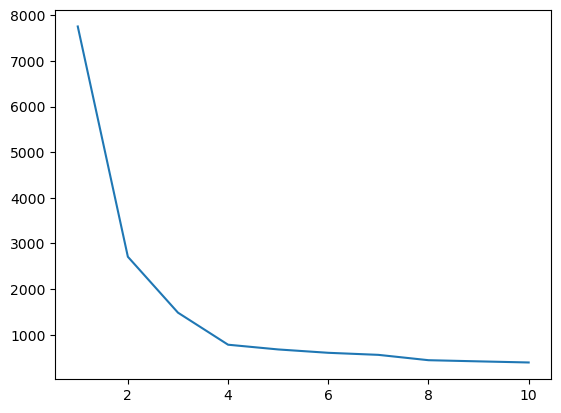

In [206]:
plt.plot(range(1, 11), wcss)

In [207]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')

In [208]:
kmeans.fit(df1)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [209]:
cluster_labels=kmeans.predict(df1)

In [210]:
df1

,Age,Gender,District
0,0.607843,0,0.052632
1,0.509804,0,0.526316
2,0.715686,0,0.578947
3,0.686275,0,0.052632
4,0.715686,0,0.657895
...,...,...,...
21848,0.725490,0,0.578947
21849,0.500000,0,0.078947
21850,0.323529,0,0.078947
21851,0.725490,0,0.078947


In [211]:
df1['cluster']=cluster_labels

C:\Users\DELL\AppData\Local\Temp\ipykernel_15980\2323374167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']=cluster_labels


In [212]:
df1['DaysAdmitted']=df['Daysdmitted']

C:\Users\DELL\AppData\Local\Temp\ipykernel_15980\3130390912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DaysAdmitted']=df['Daysdmitted']


In [154]:
df1.to_csv('age_gender_district.csv', index=False)

In [213]:
for i in range(4):
    print(df1[df1['cluster']==i].describe())

               Age  Gender     District  cluster  DaysAdmitted
count  8041.000000  8041.0  8041.000000   8041.0   8041.000000
mean      0.608105     0.0     0.136927      0.0      6.233180
std       0.138579     0.0     0.119787      0.0      5.921079
min       0.000000     0.0     0.000000      0.0      0.000000
25%       0.519608     0.0     0.052632      0.0      2.000000
50%       0.627451     0.0     0.078947      0.0      5.000000
75%       0.705882     0.0     0.236842      0.0      9.000000
max       1.000000     0.0     0.421053      0.0     71.000000
               Age  Gender     District  cluster  DaysAdmitted
count  3329.000000  3329.0  3329.000000   3329.0   3329.000000
mean      0.579009     1.0     0.739830      1.0      5.776509
std       0.124794     0.0     0.151200      0.0      5.823571
min       0.000000     1.0     0.447368      1.0      0.000000
25%       0.500000     1.0     0.578947      1.0      2.000000
50%       0.578431     1.0     0.736842      1.0      4

In [217]:
df=pd.read_csv('deathcases.csv')

In [218]:
df['cluster']=cluster_labels

In [219]:
df.to_csv('ageGenderDistrict.csv', index=False)

In [234]:
df[df['Age']<=30].groupby(df['Symptoms']).size().to_csv('Age_symptoms_group_30.csv')

In [232]:
df[(df['Age']>30)&(df['Age']<=60)].groupby(df['Symptoms']).size().to_csv('Age_symptoms_group.csv')

In [233]:
df[df['Age']>60].groupby(df['Symptoms']).size().to_csv('Age_symptoms_group_60.csv')